# <p style="text-align:center;">**Amazon Web Services SaaS Sales**</p>
### <p style="text-align:center;">**Capstone Modul 2**</p>
### <p style="text-align:center;">**Valeria Trisna Yunita**</p>
---

# **Latar Belakang**

AWS atau yang dikenal sebagai Amazon Web Services merupakan platform komputasi awan yang disediakan oleh Amazon.com. AWS menawarkan berbagai layanan komputasi, penyimpanan, jaringan, basis data, analitik, kecerdasan buatan (AI), Internet of Things (IoT), pengembangan aplikasi, keamanan, dan berbagai layanan lainnya untuk membantu organisasi mengembangkan dan menjalankan aplikasi mereka dengan lebih efisien dan fleksibilitas di lingkungan komputasi awan.

AWS memiliki banyak keunggulan, termasuk skalabilitas, keamanan, ketersediaan, dan fleksibilitas. Platform ini telah menjadi pemimpin pasar dalam komputasi awan dan menyediakan infrastruktur yang mendasari bagi banyak bisnis dan aplikasi online yang kita gunakan setiap hari. 

Dalam project ini, terdapat rekap penjualan SaaS selama th 2020 sd th 2023 yang berisikan informasi Product yang dijual, Customer yang melakukan transaksi, Sales dari Product berikut juga Profit yang diperoleh. Sekilas, penjualan SaaS dari tahun ke tahun meningkat, baik itu secara nominal dan juga quantity produk yang terjual. 

Seperti yang kita ketahui bahwa dalam bisnis retail ada 2 variabel yang memengaruhi Sales, yaitu Price & Quantity. Semakin tinggi Price maka semakin tinggi Sales yang akan diperoleh, dan semakin tinggi Quantity yang kita jual maka semakin tinggi juga Sales yang kita peroleh. Namun apabila kita hanya berfokus pada menignkatkan Price, kita bisa saja kehilangan customer loyal kita yang akan berpindah ke kompetitor kita, sedangkan apabila kita berfokus pada meningkatkan Quantity artinya kita memperkuat dan mempeluas customer kita.

Selanjutnya kita perlu meneliti lebih lanjut, Produk apa aja yang dapat dioptimalkan penjualannya dan bagaimana pengaruh quantity terhadap Sales & Profit yang akan diperoleh perusahaan. Hal itu akan membantu perusahaan untuk mengambil keputusan dan langkah kedepannya untuk menentukan program dan promosi yang tepat.

## **Pernyataan Masalah**

Dari pernyataan tersebut, dapat dirumuskan pertanyaan-pertanyaan lanjutan yang lebih rinci sebagai berikut:

1.   Bagaimana tren penjualan dari AWS dari sisi Sales, Profit, dan Quantity dari tahun ke tahun? 
2.   Bagaimana hubungan antara Produk yang diberikan diskon dengan quantity yang terjual dan profit yang dihasilkan?
3.   Apa strategi yang tepat untuk program pemasaran AWS?
3.   Produk apa sajakah yang dapat dioptimalkan untuk dijual dan dipromosikan lebih lanjut?
5.   Bagaimana pengaruh peningkatan quantity produk tertentu terhadap Sales & Profit Perusahaan?


# **Data Undestanding**
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales). 

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
import os
os.chdir("/Users/valeriatrisna/desktop/purwadhika")
df = pd.read_csv('SaaS-Sales.csv').drop(columns = 'Row ID')

display(df.head(5),df.tail(5))

,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


Dataset ini berisi informasi terkait aktivitas penjualan layanan software selama tahun 2020 sd th 2023. Ada 18 kolom di dalam dataset AWS SaaS Sales, yaitu:  

1. `Order ID`: Kode unik yang berbeda di setiap transaski.
2. `Order Date`: Tanggal ketika transaski dilakukan. 
3. `Date Key`: Angka yang merepresentasikan tanggal transaksi (YYYYMMDD). 
4. `Contact Name`: Contact Person (PIC) dari yang melakukan transaksi.
5. `Country`: Negara asal dari Perusahaan yang melakukan transaksi. 
6. `City`: Kota asal dari Perusahaan yang melakukan transaksi. 
7. `Region`: Wilayah dari Negara yang melakukan transaksi. 
8. `Subregion`: sub-Wilayah dari Negara yang melakukan transaksi.
9. `Customer`: Nama Perusahaan yang melakukan transaksi. 
10. `Customer ID`: Kode unik dari Customer. 
11. `Industry`: Industri dari Perusahaan. 
12. `Segment`: Segmen Perusahaan dari Customer (`SMB = Small, Medium Business (UMK)`, `Enterprise`, `Strategic`).
13. `Product`: Product yang dibeli. 
14. `License`: Kode lisensi dari produk. 
15. `Sales`: Jumlah total penjualan dari transaksi. 
16. `Quantity`:  Jumlah item kuantitas dari transaksi. 
17. `Discount`: Diskon yang diberikan pada transaksi.
18. `Profit`: Keuntungan yang diperoleh dari transaksi. 


## **Data Review**

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset .

In [120]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (9994, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Date Key      9994 non-null   int64  
 3   Contact Name  9994 non-null   object 
 4   Country       9994 non-null   object 
 5   City          9994 non-null   object 
 6   Region        9994 non-null   object 
 7   Subregion     9994 non-null   object 
 8   Customer      9994 non-null   object 
 9   Customer ID   9994 non-null   int64  
 10  Industry      9994 non-null   object 
 11  Segment       9994 non-null   object 
 12  Product       9994 non-null   object 
 13  License       9994 non-null   object 
 14  Sales         9994 non-null   float64
 15  Quantity      9994 non-null   int64  
 16  Discount      9994 non-null   float64
 17  Profit        99

Dari informasi di atas terdapat tipe data yang masih perlu disesuaikan yaitu pada kolom **Order Date** yang mana seharusnya berupa *datetime* dan nantinya akan disesuaikan pada *Data Cleaning*.

In [121]:
listData= []
for col in df.columns :
    listData.append( [col, df[col].nunique(), df[col].unique()])

tabelDesc = pd.DataFrame(columns=['Column Description', 'Number of Unique Value', 'Unique Value Description'],
                     data=listData)
tabelDesc

,Column Description,Number of Unique Value,Unique Value Description
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021..."
1,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4..."
2,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230..."
3,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thom..."
4,Country,48,"[Ireland, United States, Germany, Sweden, Cana..."
5,City,262,"[Dublin, New York City, Stuttgart, Stockholm, ..."
6,Region,3,"[EMEA, AMER, APJ]"
7,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LAT..."
8,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP ..."
9,Customer ID,99,"[1017, 1056, 1031, 1065, 1062, 1066, 1074, 108..."


Secara garis besar, dapat disimpulkan dari Data Frame di atas bahwa:

1. Dataset yang digunakan dalam analisis ini memiliki 18 kolom dan 9.993 baris.
2. Kolom `License` merupakan kolom yang mencakup semua unique values dan tidak ada data duplicate karena setiap produk yang dijual memiliki License yang berbeda
3. Kolom `Order ID`, `Contact Name`, `Country`, `City`, `Region`, `Subregion`, `Customer`, `Industry`, `Segment`,dan `Product` merupakan data kategorik.
4. Kolom `Sales`, `Quantity`,`Profit`merupakan data numerikal.
5. Kolom `Diskon` merupakan data numerikal diskrit dengan rentang 0 sd 1(100%) yang merupakan besar diskon diberikan kepada customer.


Setelah memahami data secara garis besar, perlu dicari apakah terdapat *missing values* atau tidak yaitu sebagai berikut:

### **Missing Values**


In [122]:
df.isna().sum()

Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Berdasarkan informasi di atas, dataset SaaS Sales tidak memiliki *missing value* atau seluruh data telah terisi, sehingga dapat dilanjutkan untuk proses *Numerik & Kategorik Understanding*.


### **Numerik Undestanding**

In [123]:
## mengambil data hanya pada kategori numerik
numerik = df.select_dtypes(include='number').drop(columns=['Date Key','Customer ID'])

In [124]:
numerik.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Dari data diatas, dapat kita simpulkan sebagai berikut:
1. Kolom Sales memiliki mean 229 dan median 54,5 dan rentang nilai yang cukup jauh yaitu 0,44 sd 22.638 
2. Kolom Quantity memiliki mean 3,7 dan median 0,2 dan memiliki rentang nilai 1 sd 14
3. Kolom Discout memiliki mean 0,15 dan median 0,2 dan memiliki rentang nilai 0 sd 0,8(80%)
4. Kolom Profit memiliki mean 28,6 dan median 8,6 dan memiliki rentang nilai yang cukup jauh yaitu -6.599 sd 8.399

selanjutnya kita dapat melihat bagaimana distribusi dari data numerik tsb dengan menggunakan histogram dan boxplot

#### **Distribusi Data**

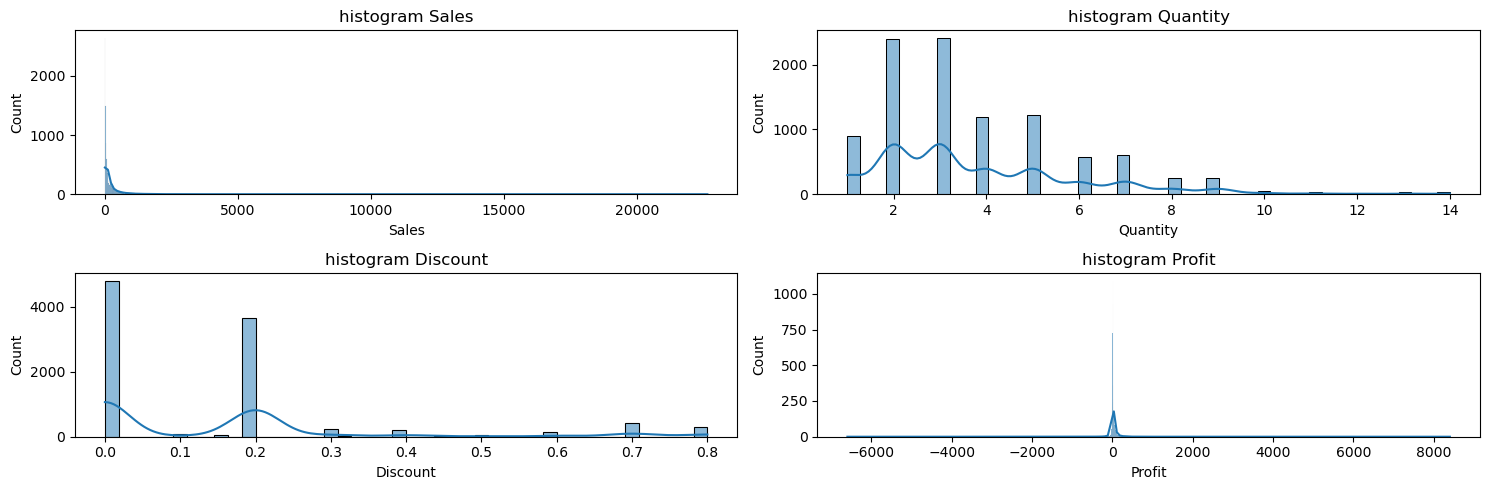

In [125]:
fig = plt.figure(figsize=(15,5)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(2,2,count)
    sns.histplot(numerik[kolom], kde=True)
    plt.title(f"histogram {kolom}")
fig.tight_layout() 
plt.show()

#### **Boxplot**

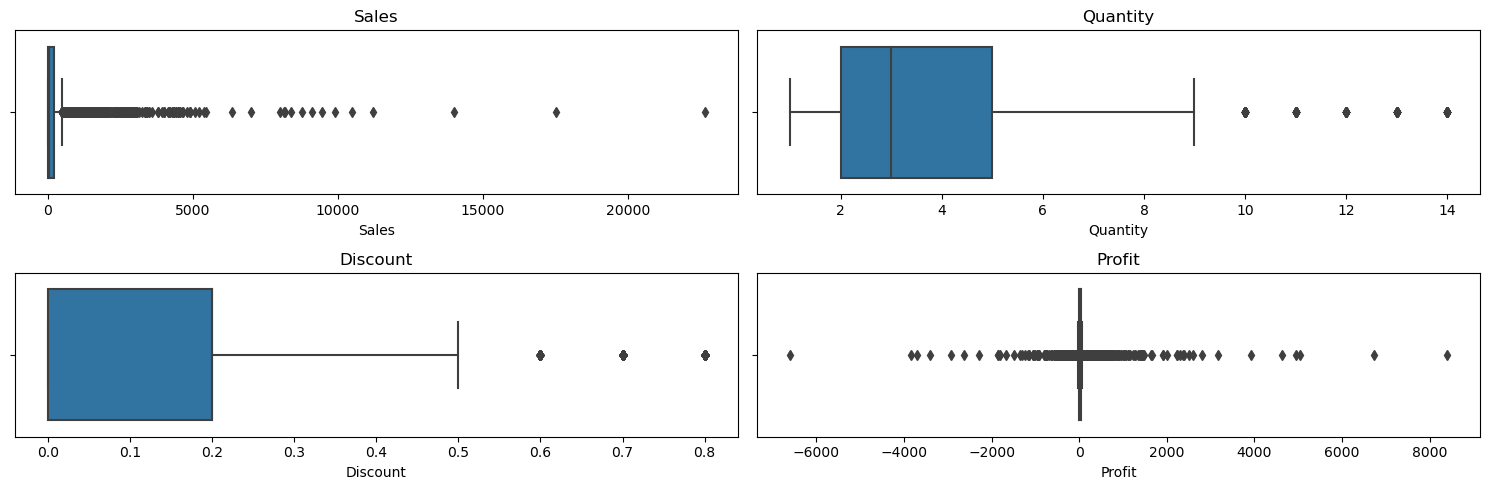

In [126]:
fig = plt.figure(figsize=(15,5)) # horizontal, vertikal

count = 0
for kolom in numerik.columns:
    count += 1
    plt.subplot(2,2,count)
    sns.boxplot(numerik, x = kolom)
    plt.title(f'{kolom}')

fig.tight_layout()
plt.show()

Berdasarkan informasi plot histogram dan boxplot, `Sales`, `Quantity`, `Discount` tidak sesuai dengan asumsi data Distribusi Normal, sedangkan data `Profit` bentuk histogram dan boxplotnya mendekati Distribusi Normal. Selanjutnya kita dapat melakukan uji kenormalan data 


In [127]:
## Uji Normalitas Data

# Kolmogorov Smirnov
from scipy.stats import kstest

stat, pvalue = kstest(numerik['Profit'], 'norm')

if pvalue < 0.05:
  print('tidak cukup bukti untuk menunjukkan bahwa data itu normal -> tidak normal')
else:
  print('data normal')


tidak cukup bukti untuk menunjukkan bahwa data itu normal -> tidak normal


#### **Outliers**

In [128]:
for kolom in numerik.columns:
    q1 = df[kolom].describe().loc['25%']
    q3 = df[kolom].describe().loc['75%']
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr 

    jumlah_outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)].shape[0]
    print(f"data {kolom} memiliki outliers {jumlah_outliers}")

data Sales memiliki outliers 1167
data Quantity memiliki outliers 170
data Discount memiliki outliers 856
data Profit memiliki outliers 1881


Berdasarkan informasi di atas, `Sales`, `Quantity`, `Discount`, dan `Profit` memiliki outlier yang cukup tinggi, outliers tersebut masih dikatakan wajar dikarenakan data tersebut bersifat numerik continus yang mewakili setiap transaksi pembelian yang dilakukan oleh customer.  

#### **Korelasi**

In [129]:
# menghitung korelasi antar data numerik, dengan menggunakan method spearman -> data tidak normal
numerik.corr(method='spearman') 

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.327426,-0.056969,0.518407
Quantity,0.327426,1.000000,-0.000878,0.234491
Discount,-0.056969,-0.000878,1.000000,-0.543350
Profit,0.518407,0.234491,-0.543350,1.000000


<Axes: >

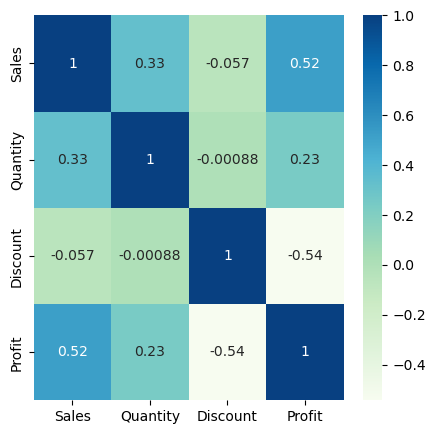

In [130]:
plt.figure(figsize=(5,5))
sns.heatmap(numerik.corr(method='spearman'), annot=True,cmap='GnBu')

Text(0.5, 1.0, 'Korelasi antara Discount & Profit')

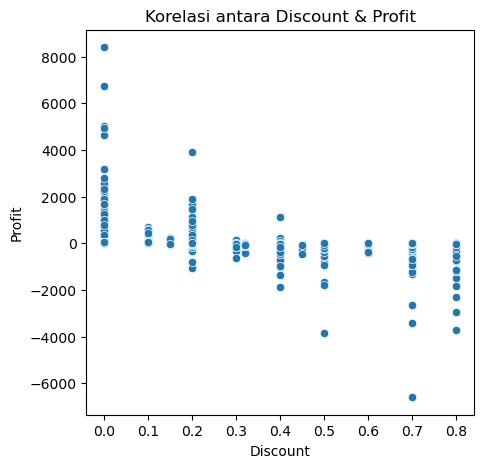

In [131]:
plt.figure(figsize=(5,5))
sns.scatterplot(data= numerik, x='Discount',y='Profit')
plt.title('Korelasi antara Discount & Profit')

Berdasarkan data heatmap diatas, dapat disimpulkan bahwa `Discount` dan `Profit` memiliki korelasi yang negatif yang artinya **Semakin tinggi Discount yang diberikan, maka semakin kecil Profit yang dihasilkan**, sedangkan `Sales` dan `Profit` memiliki korelasi yang posifit yang artinya **Semakin tinggi Sales maka semakin tinggi Profit yang dihasilkan**

### **Kategorik Understanding**

In [132]:
## mengambil hanya data kategorik
kategorik = df.select_dtypes(exclude='number')

#### **Count Values**

In [133]:
kategorik.nunique()

Order ID        5009
Order Date      1237
Contact Name     793
Country           48
City             262
Region             3
Subregion         12
Customer          99
Industry          10
Segment            3
Product           14
License         9994
dtype: int64

Berdasarkan informasi di atas dapat disimpulkan sebagai berikut:  

1. `Order ID`: memiliki 5.009 unique value.
2. `Order Date`: memiliki 1.237 unique value atau 1.237 hari catatan penjualan.
3. `Contact Name`: memiliki 793 unique value.
4. `Country`: memiliki 48 unique value atau 48 negara.
5. `City`: memiliki 262 unique value.
6. `Region`: memiliki 3 unique value.
7. `Subregion`: memiliki 12 unique value.
8. `Customer`: memiliki 99 unique value.
9. `Industry`: memiliki 10 unique value.
10. `Segment`: memiliki 3 unique value.
11. `Product`: memiliki 14 unique value. 
12. `License`: memiliki 9.994 unique value.

#### **Modus**

In [134]:
kategorik.describe(include='object')

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


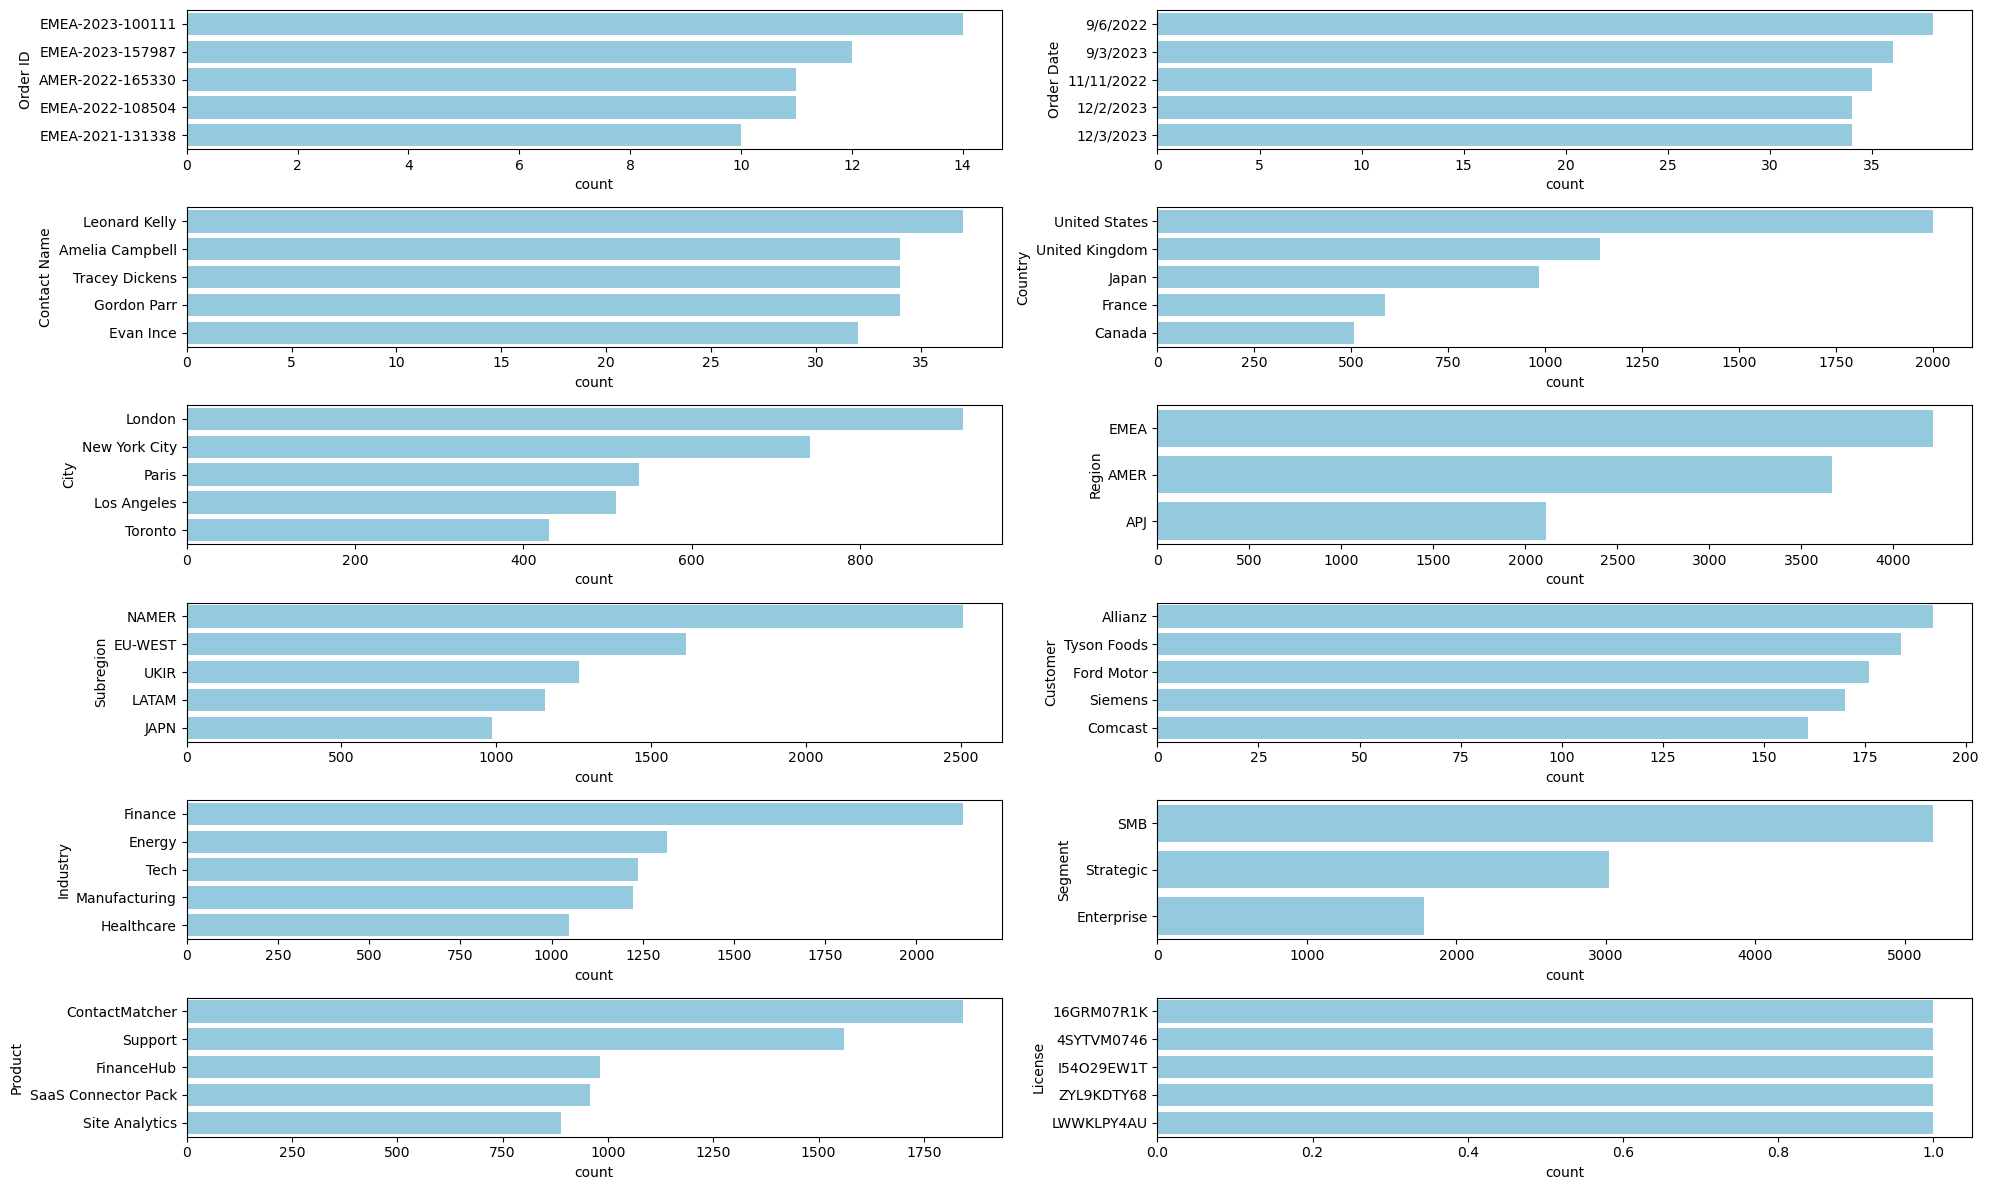

In [106]:
count = 0
fig = plt.figure(figsize=(20,12))
for kolom in kategorik.columns:
    count += 1
    plt.subplot(6,2,count)
    sns.countplot(y = kolom, data = kategorik, order = kategorik[kolom].value_counts().sort_values(ascending = False).head(5).index, color= 'skyblue')
fig.tight_layout()
plt.show()


Berdasarkan informasi di atas, dapat disimpulkan sebagai berikut: 

1. `Order ID`: EMEA-2023-100111 melakukan transaksi terbanyak yaitu sebanyak 14 kali dalam satu hari.
2. `Order Date`: tanggal 9/6/2022 (6 September 2022) merupakan hari dimana transaksi terbanyak dilakukan yaitu 38 transaksi.
3. `Contact Name`: Leonard Kelly merupakan PIC yang paling sering melakukan transaksi sebanyak 37 kali.
4. `Country`: Negara United States paling sering melakukan transaksi pembelian yaitu sebanyak 2.001 kali.
5. `City`: Kota London paling sering melakukan transaksi pembelian yaitu sebanyak 922 kali.
6. `Region`: Wilayah EMEA (Europe, the Middle East and Africa) paling sering melakukan transaksi pembelian yaitu sebanyak 4.219 kali.
7. `Subregion`: sub-Wilayah NAMER (North America) paling sering melakukan transaksi pembelian yaitu sebanyak 2.507 kali.
8. `Customer`: Allianz merupakan customer yang paling sering melakukan transaksi pembelian yaitu sebanyak 192 kali.
9. `Industry`: Industri Finance merupakan industri yang paling sering melakukan transaksi pembelian yaitu sebanyak 2.127 kali.
10. `Segment`: Segmen SMB merupakan segmen yang paling sering melakukan transaksi pembelian yaitu sebanyak 5.191 kali.
11. `Product`: Contact Matcher merupakan produk yang paling sering ditransaksikan yaitu sebanyak 1.842 kali.
12. `License`: setiap transaksi memiliki kode License yang berbeda.

## **Data Cleaning**

### **Mengubah Type Data**

In [135]:
df_prep = df.copy()

Dalam Data Review di atas, terdapat ketidaksesuaian *type data* pada kolom `Order Date`, maka dari itu sebelum kita melakukan analisa data lebih lanjut kita melakukan perubaha *type data* pada kolom `Order Date` dari *Dtype Object* menjadi *datetime64[ns]* dan juga melakukan drop drop column *Date Key* yang merupakan duplikasi dari kolom *Order Date* dengan coding sebagai berikut:

In [137]:
df_prep['Order Date'] = pd.to_datetime(df_prep['Order Date'])
df_prep = df_prep.drop(columns=['Date Key'])
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Contact Name  9994 non-null   object        
 3   Country       9994 non-null   object        
 4   City          9994 non-null   object        
 5   Region        9994 non-null   object        
 6   Subregion     9994 non-null   object        
 7   Customer      9994 non-null   object        
 8   Customer ID   9994 non-null   int64         
 9   Industry      9994 non-null   object        
 10  Segment       9994 non-null   object        
 11  Product       9994 non-null   object        
 12  License       9994 non-null   object        
 13  Sales         9994 non-null   float64       
 14  Quantity      9994 non-null   int64         
 15  Discount      9994 non-null   float64 

### **Handling Outliers**

Dalam plot histgram dan boxplot diatas, tampak bahwa kolom `Profit` memiliki outlier yang cukup besar yaitu berkisar *-7.000 sd 9.000* sedangkan *mean*-nya sebesar 28 dan *median*-nya sebesar 8,6. Untuk itu, kita perlu lakukan pengecekan outliers dari kolom `Profit` apakah perlu dilakukan *drop data* atau tidak.

In [138]:
def cek_outliers(kolom, df_prep):
  q1 = numerik[[kolom]].describe().loc['25%'][0]
  q3 = numerik[[kolom]].describe().loc['75%'][0]
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)
  display(df_prep[(df_prep[kolom] > upper_bound) | (df_prep[kolom] < lower_bound)].sort_values(kolom))

In [139]:
cek_outliers('Profit', df_prep)

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
7772,AMER-2022-108196,2022-11-26,Faith Campbell,Mexico,Tijuana,AMER,LATAM,Allstate,1003,Finance,SMB,Big Ol Database,PM66ENV0DN,4499.985,5,0.7,-6599.9780
683,EMEA-2023-168116,2023-11-05,Emily Fisher,Sweden,Gothenburg,EMEA,NOR,Costco Wholesale,1025,Retail,Strategic,Big Ol Database,BT5A3EPA0H,7999.980,4,0.5,-3839.9904
9774,APJ-2020-169019,2020-07-26,Lily Bond,Japan,Osaka,APJ,JAPN,Bosch,1076,Tech,SMB,ContactMatcher,FT1VQ5PHAG,2177.584,8,0.8,-3701.8928
3011,EMEA-2023-134845,2023-04-18,Joshua Vaughan,Russia,Moscow,EMEA,EU-EAST,FedEx,1036,Transportation,Enterprise,Big Ol Database,UN48B3LEBM,2549.985,5,0.7,-3399.9800
4991,APJ-2023-122714,2023-12-08,Ruth Vaughan,Australia,Sydney,APJ,ANZ,Ford Motor,1009,Manufacturing,Strategic,ContactMatcher,WWN9Y458G2,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,EMEA-2020-116904,2020-09-23,Deirdre McDonald,Luxembourg,Luxembourg,EMEA,EU-WEST,Anthem,1029,Healthcare,SMB,ContactMatcher,TBTJ3FL8AN,9449.950,5,0.0,4630.4755
9039,AMER-2022-117121,2022-12-18,Carolyn Parr,Brazil,São Paulo,AMER,LATAM,Valero Energy,1093,Energy,SMB,ContactMatcher,VTADHKI6Q5,9892.740,13,0.0,4946.3700
4190,APJ-2023-166709,2023-11-18,Austin Peters,Philippines,Manila,APJ,APAC,Lowes,1060,Retail,SMB,Alchemy,VMQF7AQCQI,10499.970,3,0.0,5039.9856
8153,AMER-2023-140151,2023-03-24,Cameron MacLeod,Canada,Toronto,AMER,NAMER,Mondelez International,1067,Consumer Products,SMB,Alchemy,LKBTOXAMTV,13999.960,4,0.0,6719.9808


Berdasarkan data table di atas, batas bawah dari kolom `Profit` adalah -6.599, apabila dicermati lebih lanjut nilai Profit tersebut bernilai negatif disebabkan oleh nilai pada kolom `Discount` yang tinggi sebesar 70%. Hal tersebut sesuai dengan hubungan korelasi negatif antara `Price` dan `Discount`, begitu pula pada batas atas dari kolom `Profit` adalah 8.399, Profit tinggi tersebut dapat dicapai ketika Discount yang diberikan 0%. Sehingga tidak perlu dilakukan handling outliers pada kolom `Profit` karna outliers tersebut masih dikatakan wajar, dan dapat disimpulkan bahwa tidak ada anomali data. 

In [160]:
MS = df_prep[df_prep['Product']=='Marketing Suite']

In [163]:
MS_negatif = MS[MS['Profit']<0]['Discount'].mean()
MS_negatif

0.3485321100917431

In [164]:
MS_positif = MS[MS['Profit']>0]['Discount'].mean()
MS_positif

0.08247863247863248

# **EDA (Exploratory Data Analysis)**

Kita telah melakukan screening data melalui Data Understanding, sekarang kita akan melakukan analisis data untuk mencari tahu strategi dan produk apa yang dapat dioptimalkan oleh perusahaan. 

Analisa yang pertama kita akan membandingkan bagaimana tren penjualan SaaS dari tahun ke 

## Tren Sales, Profit, Quantity of SaaS YoY

In [140]:
df_prep['Order Year'] = df_prep['Order Date'].dt.to_period('Y')

In [141]:
## Mengelompokkan data Sales, Profit dan Quantity setiap tahunnya
tren_table = df_prep.pivot_table(index='Order Year', values=['Profit','Sales','Quantity'], aggfunc="sum").reset_index()
tren_table['Order Year'] = tren_table['Order Year'].dt.year
tren_table

,Order Year,Profit,Quantity,Sales
0,2020,49543.9741,7581,484247.4981
1,2021,61618.6037,7979,470532.5090
2,2022,81726.9308,9810,608473.8300
3,2023,93507.5131,12503,733947.0232


/var/folders/y2/bq22v105657gm7n31m12b4rm0000gn/T/ipykernel_1965/3777899258.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tren_table,x='Order Year',y=kolom, ci=None,label=kolom + ' (Line)')
/var/folders/y2/bq22v105657gm7n31m12b4rm0000gn/T/ipykernel_1965/3777899258.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tren_table,x='Order Year',y=kolom, ci=None,label=kolom + ' (Line)')
/var/folders/y2/bq22v105657gm7n31m12b4rm0000gn/T/ipykernel_1965/3777899258.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=tren_table,x='Order Year',y=kolom, ci=None,label=kolom + ' (Line)')


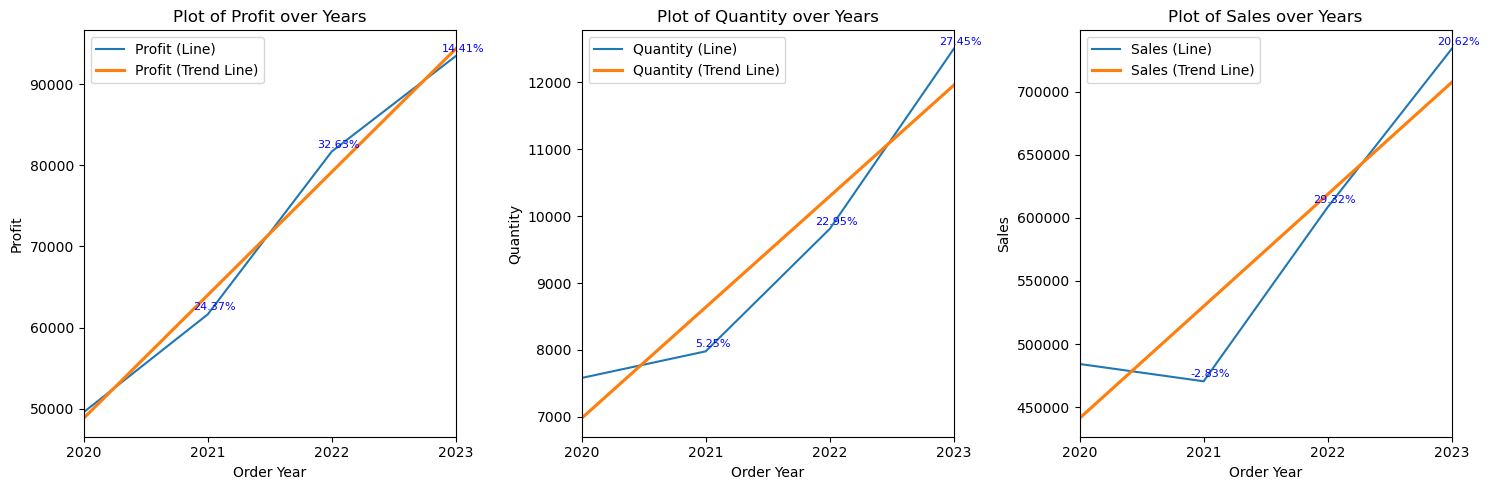

In [142]:
count = 0
fig = plt.figure(figsize=(15,5))
for kolom in tren_table.columns.difference(['Order Year']):
    count += 1
    ax = plt.subplot(1,3,count)
    sns.lineplot(data=tren_table,x='Order Year',y=kolom, ci=None,label=kolom + ' (Line)')
    sns.regplot(data=tren_table, x='Order Year', y=kolom, scatter=False,ci=None,label=kolom + ' (Trend Line)')
    # Calculate growth rates
    growth_rates = tren_table[kolom].pct_change() * 100
    # Annotate growth rates
    for i, growth_rate in enumerate(growth_rates):
        if i == 0:
            continue  # Skip the first year
        ax.annotate(f'{growth_rate:.2f}%', 
                    xy=(tren_table['Order Year'].iloc[i], tren_table[kolom].iloc[i]), 
                    xytext=(5, 5), 
                    textcoords='offset points', 
                    ha='center', 
                    va='center', 
                    fontsize=8,
                    color='blue')
        plt.xlim(2020,2023)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.legend()
    plt.title('Plot of ' + kolom + ' over Years')
plt.tight_layout()
plt.show()


Secara garis besar untuk mengoptimalkan Penjualan(Sales), ada 2 variable untuk mengoptimalkannya yaitu melalui meningkatkan **Quantity** Produk yang dijual atau **Price(Harga)** yang meningkat. Berdasarkan plot di atas dapat disimpulkan sebagai berikut: 

* Tren pertumbuhan Sales secara garis besar meningkat selama 2020 sd 2023, namun di tahun 2021 terdapat penurunan Sales (Penjualan) yang dimana tahun tersebut bisnis-bisnis mulai bangkit dari Covid-19.
* Tren pertumbuhan Quantity dari tahun ke tahun tumbuh, dan di th 2023 quantity yang dijual menembus 12.503 item produk yang terjual dalam setahun.   
* Tren pertumbuhan Profit dari SaaS Sales tumbuh dari tahun ke tahun, pertumbuhan tertinggi di tahun 2022 yaitu Profit tumbuh 32,63% dan di tahun 2023 tumbuh sebesar 14,41%.
* Di tahun 2021, Sales turun namun quantity dan Profit masih tetap terjaga dengan tumbuh positif, hal ini menandakan Produk AWS selama Covid-19 eksistensinya masih terjaga. 
* Selain itu dilansir dari [website](https://blog.neterra.cloud/en/2022-could-be-a-big-year-for-the-cloud-industry-heres-what-to-expect/) bahwa di tahun 2022 banyak usaha yang mulai menggunakan layanan cloud computing dan juga AI mulai bermunculan, dan bila dibandingkan dengan penjualan SaaS dari AWS juga sejalan meningkat di tahun 2022 baik dari sisi Sales, Profit, dan Quantity yang meningkat.  


## Produk dengan Quantity tertinggi vs Profit tertinggi


In [143]:
## Mengelompokkan Profit, Quantity, dan Avg Discount per Produk
product_table = df_prep.groupby('Product').agg({'Quantity':'sum','Profit':'sum','Discount':'mean'}).reset_index()
product_table

,Product,Quantity,Profit,Discount
0,Alchemy,234,55617.8249,0.161765
1,Big Ol Database,440,3384.7569,0.306087
2,ChatBot Plugin,3000,6527.7870,0.074874
3,ContactMatcher,7215,12496.2822,0.353067
4,Data Smasher,2976,41936.6357,0.078452
5,FinanceHub,3756,32136.4203,0.132518
6,Marketing Suite,868,-3472.5560,0.211140
7,Marketing Suite - Gold,3158,21278.8264,0.074704
8,OneView,1729,18138.0054,0.166524
9,SaaS Connector Pack,3563,13059.1436,0.138349


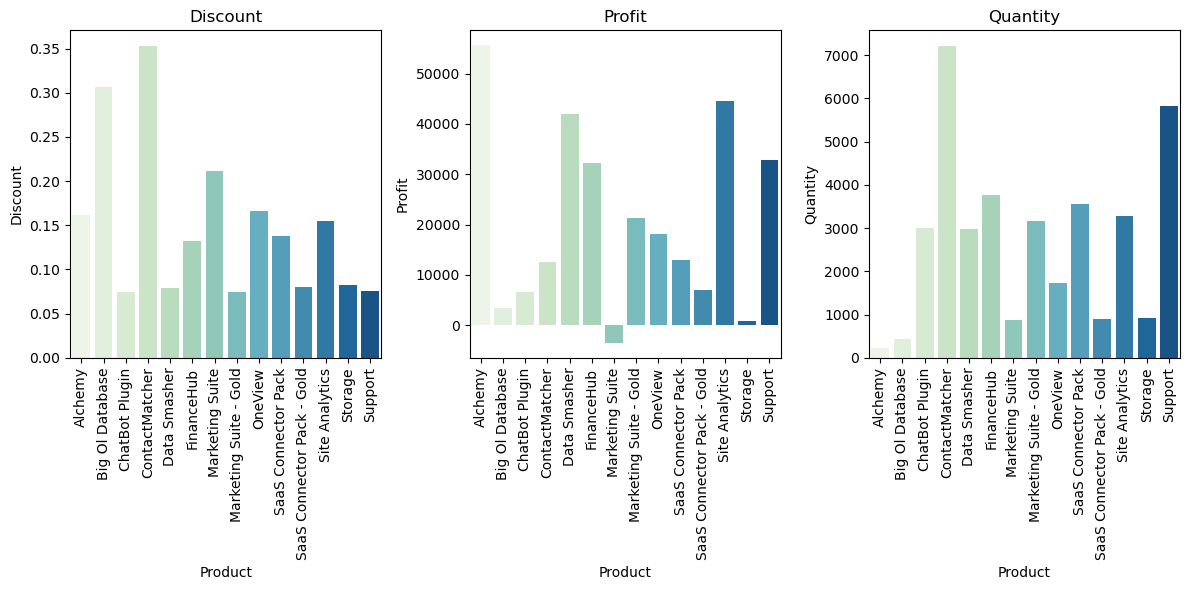

In [144]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for i, column in enumerate(product_table.columns.difference(['Product'])):
    col_palette = sns.color_palette("GnBu", len(product_table['Product'].unique()))
    sns.barplot(x='Product', y=column, data=product_table, ax=axes[i],palette=col_palette)
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', labelrotation=90)

plt.tight_layout()
plt.show()

Berdasarkan plot di atas dapat disimpulkan sebagai berikut: 
* Produk yang diberikan diskon terbesar **Contact Matcher** dimana hal tersebut berpengaruh thd Quantity Produk terjual selama 2020 sd 2023, produk yang paling tinggi penjualannya adalah Contact Matcher.
* Produk **Alchemy** merupakan produk yang yang menyumbang profit tertinggi selama 2020 sd 2023 namun quantity yang terjual minim.
* Produk **Marketing Suite** merupakan produk yang menyebabkan profit minus. 

Hal tersebut membuat suatu pertanyaan, apakah ada korelasi antara diskon yang diberikan dengan quantity produk yang terjual seperti pada Contact Mathcher yang quantitynya paling banyak dijual.

**Uji Korelasi antara Discount dan Quantity**

Text(0.5, 1.0, 'Korelasi antara Discount & Quantity')

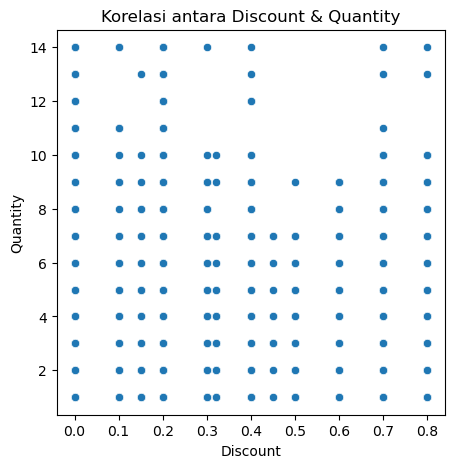

In [145]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df_prep, x='Discount',y='Quantity')
plt.title('Korelasi antara Discount & Quantity')

In [146]:
print(df_prep['Discount'].corr(df_prep['Quantity'],method='spearman'))

-0.0008781540994630739


Berdasarkan uji korelasi spearman dan scatter plot antara Discount dan Quantity, ternayata tidak ada korelasi yang kuat antara besaran diskon yang diberikan dengan quantity produk yang terjual. Hal ini juga bisa mengindikasikan bahwa pemberian diskon belum tepat sasaran untuk meningkatkan penjualan karna tidak berdampak pada quantity penjualan produk.

## Menghitung avg Price & Profit per Product

In [147]:
## Menghitung rata-rata Price & Profit per Produk
sales_product = df_prep.groupby('Product').agg({'Quantity':'sum','Sales':'sum','Profit':'sum','Discount':'mean'}).reset_index()
sales_product['Price Product'] = sales_product['Sales']/sales_product['Quantity']
sales_product['Profit Product'] = sales_product['Profit']/sales_product['Quantity']
sales_product['Margin'] = sales_product['Profit Product']/sales_product['Price Product'] *100
sales_product

,Product,Quantity,Sales,Profit,Discount,Price Product,Profit Product,Margin
0,Alchemy,234,149528.0300,55617.8249,0.161765,639.008675,237.683012,37.195585
1,Big Ol Database,440,189238.6310,3384.7569,0.306087,430.087798,7.692629,1.788618
2,ChatBot Plugin,3000,27118.7920,6527.7870,0.074874,9.039597,2.175929,24.071083
3,ContactMatcher,7215,410378.2650,12496.2822,0.353067,56.878484,1.731986,3.045064
4,Data Smasher,2976,167380.3180,41936.6357,0.078452,56.243386,14.091611,25.054700
5,FinanceHub,3756,340935.4150,32136.4203,0.132518,90.770877,8.556022,9.425955
6,Marketing Suite,868,114879.9963,-3472.5560,0.211140,132.350226,-4.000641,-3.022768
7,Marketing Suite - Gold,3158,223843.6080,21278.8264,0.074704,70.881446,6.738070,9.506113
8,OneView,1729,107532.1610,18138.0054,0.166524,62.193268,10.490460,16.867517
9,SaaS Connector Pack,3563,91705.1640,13059.1436,0.138349,25.738188,3.665210,14.240358


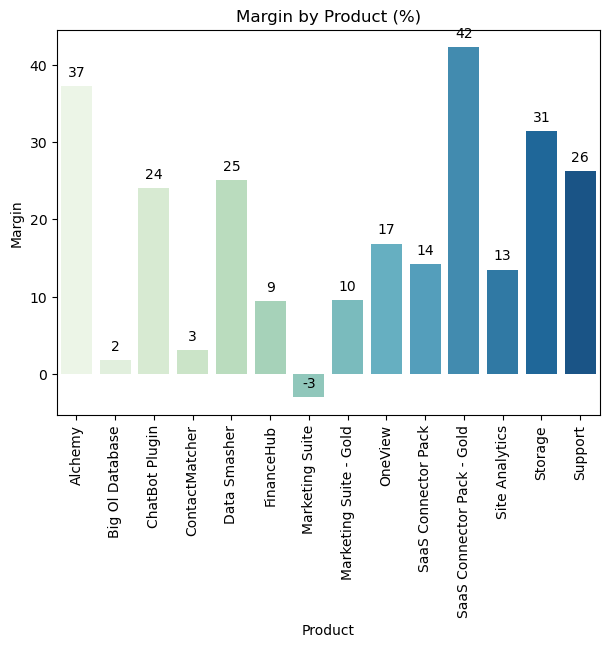

In [148]:
plt.figure(figsize=(7,5))
ax = sns.barplot(x='Product', y='Margin', data=sales_product, palette='GnBu')
plt.title('Margin by Product (%)')  
plt.xlabel('Product')  
plt.ylabel('Margin')  
plt.xticks(rotation=90)  

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')
    
plt.show()

Dari tabel di atas dapat kita disimpulkan sebagai berikut: 
* Harga rata-rata produk **Alchemy** merupakan paling tinggi dibandingkan produk lainnya dengan profit yang margin yang dihasilkan cukup tebal di 37%.
* Produk yang murah yang dijual AWS adalah **Storage**, dengan margin yang dihasilkan 31%. 
* Produk **Marketing Suite** harga rata-ratanya sebesar $132, namun apabila dilihat harganya tersebut memberikan kerugian sebesar -$4 pada setiap penjualannya. Apabila kita teliti lebih lanjut, dilansir dari [website](https://www.webfx.com/blog/marketing/amazon-vs-google/#) AWS Marketing Ads apabila dibandingkan dengan Google dalam beberapa fiturnya masih kalah. Hal tersebut bisa jadi merupakan promosi yang digunakan oleh AWS untuk merebut pangsa dari Google.
* Produk **Contact Matcher** quantity terjualnya yang paling banyak ternyata hanya memberikan margin 3%. 
* Margin yang tinggi, belum tentu memberikan Sales/Profit yang optimal.

Selanjutnya kita melakukan pengecekan, apakah produk yang bisa ditingkatkan penjualannya, dan seberapa pengaruh terhadap Sales & Profit.

## Market Basket Analysis

Market basket analysis (MBA) adalah teknik data mining yang digunakan untuk untuk meningkatkan penjualan dengan lebih memahami pola pembelian dari customers. 
Sebelum kita melihat lebih lanjut, kita akan melakukan pengecekan berapa produk kah yang dibeli oleh Customer dalam satu kali transaksi.

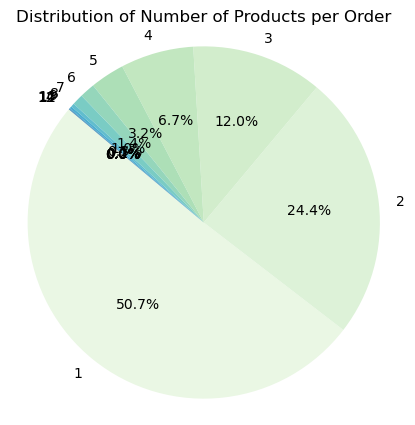

In [149]:
group_customer = df_prep.groupby('Order ID').agg({'Product':'count','Quantity':'sum'}).reset_index()

plt.figure(figsize=(5, 5))
# Mengelompokkan berdasarkan jumlah produk per transaksi
sizes = group_customer['Product'].value_counts().tolist()
labels = group_customer['Product'].value_counts().index.tolist()

custom_palette = sns.color_palette('GnBu', len(labels))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=custom_palette)

plt.axis('equal')  
plt.title('Distribution of Number of Products per Order')

plt.show()

Dari pie plot diatas, dapat disimpulkan, 50,7% transaksi membeli 1 jenis produk, dan 24,45% transaksi memberi 2 jenis produk berbeda. Main point yang selanjutnya menjadi fokus kita adalah, nasabah yang membeli 2 produk atau lebih tersebut, apa sajakah produk dominan yang mereka beli, dan bagaimana peningkatan produk tersebt terhadap Sales/Profit perusahaan. 

Sebelum lebih jauh, kita melakukan uji hipotesis *Apakah ada hubungan antara jumlah jenis Produk yang dibeli dengan Quantitas produk terjual*.

Dalam uji hipotesis ini kita menggunakan *T Test Two Sample Independent*, dengan 

H0 : Quantity produk yang membeli 1 jenis produk = Quantity produk yang membeli lebih dari 1 jenis produk  
Ha : Ada perbedaan signifkan antara Quantity produk yang membeli 1 jenis produk, dan Quantity produk yang membeli lebih dari 1 jenis produk  

In [150]:
from scipy.stats import ttest_ind
quantity_1produk = group_customer[group_customer['Product']==1]['Quantity']
quantity_lebih1produk = group_customer[group_customer['Product']>=1]['Quantity']

t_score, pval = ttest_ind(quantity_1produk,quantity_lebih1produk)

if pval > 0.05:
    print("H0 Diterima")
    print("Tidak ada cukup bukti untuk menolak H0")
    print("Tidak ada perbedaan signifikan antara quantity yang membeli 1 produk dan lebih dari 1 produk")
else:
    print("H0 Ditolak")
    print("Ada cukup bukti untuk menolak H0")
    print("Ada perbedaan signifikan antara quantity yang membeli 1 produk dan lebih dari 1 produk")

H0 Ditolak
Ada cukup bukti untuk menolak H0
Ada perbedaan signifikan antara quantity yang dibeli oleh 1 produk dan lebih dari 1 produk


Dengan demikian ada hubungan yang kuat antara jumlah jenis produk yang dibeli dengan quantity yang terjual. Hal ini dapat mengindikasikan bahwa semakin banyak jenis produk yang dibeli, maka semakin tinggi quantity yang terjual dan semakin tinggi sales yang akan diperoleh. 
Selanjutnya, kita dapat meembuat program promosi yang tepat untuk meningkatkan sales.

Price & Product Bundling memiliki impact yang positif terhadap niat membeli dari customer, dan menguatkan argumen bahwa minat membeli konsumen lebih tinggi pada saat   produk   di-bundling dibandingkan   dengan   produk   yang   dijual   tersendiri (Andreas Wijaya & Loedry Killer, 2020).

Dengan demikian kita dapat membuat program promosi dan produk apa sajakah yang tepat untuk dibuatkan bundling-nya sesuai dengan Customer's Habit melalui Market Basket Analysis.

In [151]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [152]:
data_mba = df_prep.groupby(['Order ID', 'Product'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Order ID')
data_mba.head(5)

Product,Alchemy,Big Ol Database,ChatBot Plugin,ContactMatcher,Data Smasher,FinanceHub,Marketing Suite,Marketing Suite - Gold,OneView,SaaS Connector Pack,SaaS Connector Pack - Gold,Site Analytics,Storage,Support
Order ID,,,,,,,,,,,,,,
AMER-2020-100090,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AMER-2020-100279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
AMER-2020-100363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0
AMER-2020-100762,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
AMER-2020-100860,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

my_basket_sets = data_mba.applymap(my_encode_units)

#Generatig frequent itemsets
my_frequent_itemsets = apriori(my_basket_sets, min_support=0.01,use_colnames=True) ## dengan asumsi frekuensi munculnya bersamaan 1%
#generating rules
my_rules = association_rules(my_frequent_itemsets, metric="lift", min_threshold=1)

my_rules

/Users/valeriatrisna/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ChatBot Plugin),(Site Analytics),0.145937,0.162507,0.024755,0.169631,1.043833,0.001040,1.008578,0.049168
1,(Site Analytics),(ChatBot Plugin),0.162507,0.145937,0.024755,0.152334,1.043833,0.001040,1.007546,0.050140
2,(ContactMatcher),(OneView),0.309842,0.090038,0.029946,0.096649,1.073431,0.002049,1.007319,0.099119
3,(OneView),(ContactMatcher),0.090038,0.309842,0.029946,0.332594,1.073431,0.002049,1.034090,0.075176
4,(SaaS Connector Pack),(Marketing Suite - Gold),0.175085,0.155121,0.027550,0.157355,1.014401,0.000391,1.002651,0.017209
...,...,...,...,...,...,...,...,...,...,...
77,"(FinanceHub, Support)",(Marketing Suite - Gold),0.044320,0.155121,0.010182,0.229730,1.480973,0.003307,1.096861,0.339830
78,"(Marketing Suite - Gold, Support)",(FinanceHub),0.039928,0.176882,0.010182,0.255000,1.441642,0.003119,1.104857,0.319087
79,(FinanceHub),"(Marketing Suite - Gold, Support)",0.176882,0.039928,0.010182,0.057562,1.441642,0.003119,1.018711,0.372178
80,(Marketing Suite - Gold),"(FinanceHub, Support)",0.155121,0.044320,0.010182,0.065637,1.480973,0.003307,1.022814,0.384396


In [153]:
# mengambil rule/kombinasi dengan tingkat confidence > 35%
my_rules[(my_rules['confidence'] > 0.35) & (my_rules['lift'] > 1)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
22,"(FinanceHub, Marketing Suite - Gold)",(ContactMatcher),0.027351,0.309842,0.010381,0.379562,1.225017,0.001907,1.112372,0.188850
28,"(SaaS Connector Pack, FinanceHub)",(ContactMatcher),0.028948,0.309842,0.010781,0.372414,1.201946,0.001811,1.099702,0.173025
35,"(FinanceHub, Site Analytics)",(ContactMatcher),0.027750,0.309842,0.010381,0.374101,1.207391,0.001783,1.102666,0.176670
41,"(FinanceHub, Support)",(ContactMatcher),0.044320,0.309842,0.015572,0.351351,1.133968,0.001840,1.063993,0.123620
46,"(SaaS Connector Pack, Marketing Suite - Gold)",(ContactMatcher),0.027550,0.309842,0.010381,0.376812,1.216140,0.001845,1.107462,0.182761
58,"(ContactMatcher, OneView)",(Support),0.029946,0.266121,0.010980,0.366667,1.377819,0.003011,1.158756,0.282681
60,"(OneView, Support)",(ContactMatcher),0.025354,0.309842,0.010980,0.433071,1.397714,0.003124,1.217362,0.291948
76,"(FinanceHub, Marketing Suite - Gold)",(Support),0.027351,0.266121,0.010182,0.372263,1.398848,0.002903,1.169086,0.293144


Dari analisa *Market Basket Analysis* di atas dengan threshold min support 1%, dan kita hanya mengambil rule/kombinasi dengan tingkat confidence 35%, adapun beberapa kesimpulan yang dapat kita ambil sebagai berikut:
* Customer membeli produk FinancHub & Marketing Suite-Gold juga membeli ContactMatcher frekuensi munculnya 1,04% dengan tingkat confidence 37,9% dan korelasi antara antecedent & consequent bernilai positif. 
* Dari beberapa transaksi dengan tingkat confidence > 35%, customer membeli ContactMatcher. Hal ini bisa memberikan gambaran bahwa kita membuat program pemasaran untuk produk FinanceHub, Marketing Suite-Gold, SaaS Connector Pack, Site Analytics, Support, OneView otomatis juga akan meningkatkan penjualan ContactMatcher. 

Dengan demikian, kita dapat fokus untuk membuat program pemasaran bundling produk sebagai berikut:
- FinanceHub & Marketing Suite-Gold 
- SaaS Connector Pack & FinanceHub
- FinanceHub & Site Analytics
- FinanceHub & Support
- SaaS Connector Pack & Marketing Suite-Gold
- ContactMatcher & OneView
- OneView & Support
- FinanceHub & Marketing Suite-Gold


## Proyeksi Sales & Profit ke Depannya

Apabila promosi tersebut terlaksana dengan baik, asumsi peningkatan quantity produk-propduk tersebut meningkat sebanyak 5% dari tahun sebelumnya (Histori growth quantity yoy 5,25% sd 27,45%) 
maka proyeksi Sales & Profit dari SaaS Sales meningkat sebagai berikut:

In [154]:
table_quantity = df_prep.pivot_table(index=['Product'], columns=['Order Year'],values='Quantity',aggfunc="sum").reset_index()
table_quantity.columns.name = None

for kolom in table_quantity.columns.difference(['Product']):
    table_quantity.rename(columns={kolom: str(kolom)+' year'}, inplace=True)

# Asumsi Peningkatan Quantity 5% fokus 7 item tersebut

Prog_2024 = []
list_products = ['FinanceHub','Site Analytics','OneView','ContactMatcher','SaaS Connector Pack','Marketing Suite - Gold','Support']

table_quantity['Prog_2024'] = table_quantity.apply(lambda row: row['2023 year'] * 1.05 if row['Product'] in list_products else row['2023 year'], axis=1)
table_quantity


,Product,2020 year,2021 year,2022 year,2023 year,Prog_2024
0,Alchemy,29,63,69,73,73.00
1,Big Ol Database,96,94,129,121,121.00
2,ChatBot Plugin,613,608,673,1106,1106.00
3,ContactMatcher,1359,1450,1939,2467,2590.35
4,Data Smasher,580,635,682,1079,1079.00
5,FinanceHub,866,791,977,1122,1178.10
6,Marketing Suite,153,242,197,276,276.00
7,Marketing Suite - Gold,673,655,804,1026,1077.30
8,OneView,314,365,396,654,686.70
9,SaaS Connector Pack,660,770,1036,1097,1151.85


In [155]:
sales_2023 = tren_table.loc[3]['Sales']
profit_2023 = tren_table.loc[3]['Profit']

In [156]:
merged_df = pd.merge(table_quantity, sales_product, on='Product', how='left').drop(columns=['2020 year','2021 year','2022 year','Quantity','Sales','Profit','Discount'])
merged_df['Prog Sales'] = merged_df['Prog_2024']*merged_df['Price Product']
merged_df['Prog Profit'] = merged_df['Prog_2024']*merged_df['Profit Product']

print(f'Secara total, setiap peningkatan quantity {(table_quantity["Prog_2024"].sum()/table_quantity["2023 year"].sum()-1)*100:.2f}% akan meningkatkan: ')
print(f'Proyeksi Sales akan menjadi {merged_df["Prog Sales"].sum():.0f} dengan growth {(merged_df["Prog Sales"].sum()-sales_2023)/sales_2023*100:.2f}%')
print(f'Proyeksi Profit akan menjadi {merged_df["Prog Profit"].sum():.0f} dengan growth {(merged_df["Prog Profit"].sum()-profit_2023)/profit_2023*100:.2f}%')


Secara total, setiap peningkatan quantity 3.74% akan meningkatkan: 
Proyeksi Sales akan menjadi 772088 dengan growth 5.20%
Proyeksi Profit akan menjadi 96934 dengan growth 3.66%


# **Kesimpulan**

Berdasarkan EDA di atas, dapat disimpulkan bahwa:

1. AWS Sales meningkat dari tahun ke tahun, peningkatan tersebut seiring juga dengan quantity produk yang terjual. Hal ini menunjukkan bahwa perusahaan tidak hanya mendapatkan keuntungan dan peningkatkan dari sisi penjualan saja, serta mengindikasikan bahwa perusahaan memiliki kondisi pasar yang cukup baik.

2. Tahun 2022 merupakan tahun dimana cloud computing mulai dikenal oleh perusahaan-perusahaan, dan AWS menjadi salah satu perusahaan yang dipercaya product SaaSnya, terlihat dari Sales, Profit, & Quantity Product Perusahaan yang juga meningkat di tahun tersebut.

3. Product Contact Macher merupakan produk yang mendapatkan diskon tertinggi dan quantity yang terjual selama th 2020 sd 2023 tertinggi dibanding produk lainnya, apabila dilihat secara sekilas terdapat korelasi antara pemberian diskon dengan quantity yang terjual. Namun setelah dilakukan uji korelasi & melihat scatter plot tidak ada korelasi yang kuat antara Discount & Quantity yang terjual. Hal ini juga mengindikasikan pemberian diskon belum tepat, sehingga belum menarik untuk customer membeli product tersebut. 

4. Product Alchemy merupakan penyumbang profit tertinggi, apabila diteliti lebih lanjut harga per produknya juga tertinggi bila dibandingkan dengan produk lainnya, dengan margin profit sebesar 37%. Harga rata-rata produk berkisar $3,3 sd $639 per produknya, dengan margin profit yang diperoleh -3% sd 42%. Margin yang tinggi belum tentu memberkan sales/profit yang maksimal kepada Perusahaan. 

5. Dari 5.009 transaksi, 50,7% transaksi hanya membeli 1 produk, dan 24,4% transasksi melakukan pembelian 2 produk berbeda. Dengan memanfaatkan pola transaksi cusotmer yang melakukan pembelian > 2 produk berbeda, kita bisa menentukan produk yang bisa dibundling dan diberikan promosi. 

6. Dari beberapa transaksi kita juga dapat melihat kecendrungan pembelian produk FinanceHub, Marketing Suite-Gold, SaaS Connector Pack, Site Analytics, Support, OneView otomatis juga akan meningkatkan pembelian produk ContactMatcher dengant tingkat confidence > 35%. 



# **Saran / Rekomendasi**

Saran dan rekomendasi yang diharapkan dapat menyelesaikan pertanyaan masalah seperti telah dijelaskan di penelitian ini adalah sebagai berikut:

- Pemberian Discount agar dipilah dan dipilih kembali, mengingat pemberian Discount yang random tidak berdampak pada quantity produk yang terjual sehingga tidak meningkatkan Sales dan Profit Perusahaan. 

- Membuat program promosi product & price bundling berdasarkan Customer's Habit, yang memiliki pengaruh kuat terhadap peningkatan quantity produk yang dijual. 

-  Pembuatan produk bundling diharapkan mampu meningkatkan quantity produk yang terjual dan meningkatkan Sales & Profit Perusahaan. Adapun suggest produk bundling sebagai berikut: 
    * FinanceHub, Marketing Suite-Gold, & ContactMatcher
    * SaaS Connector Pack, FinanceHub, & ContactMatcher
    * FinanceHub, Site Analytics, & ContactMatcher
    * FinanceHub, Support, & ContactMatcher
    * SaaS Connector Pack, Marketing Suite-Gold, & ContactMatcher
    * ContactMatcher, OneView, & Support
    * OneVie, Support, & ContactMatcher
    * FinanceHub, Marketing Suite-Gold, & Support

    Dengan asumsi peningkatan quantitiy 5% thd item item tersebut, maka prognosa Sales Perusahaan akan tumbuh 5,2% dan Profit Perusuhaan akan tumbuh 3,66%.
